In [58]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tqdm

In [18]:
class RandomWalkEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, size):
        self.action_space = spaces.Discrete(2)
        self.size = size
    
    def step(self):
        reward = 0
        action = np.random.randint(0, 2)
        done = False
        if (action == 0):
            self.state -= 1
        if (action == 1):
            self.state += 1
        if (self.state >= self.size):
            reward = 1
            done = True
        if (self.state < 0):
            done = True
        return np.array(self.state), reward, done, {}
    
    def reset(self):
        self.state =  int(self.size/2)
        return self.state
    
    def render(self, mode='human', close=False):
        if close:
            return
        for i in range(self.size):
            if i == self.state:
                print('O', end=' ')
            else:
                print('––', end=' ')

In [19]:
env = RandomWalkEnv(19)

In [66]:
### Gradient Monte Carlo Algorithm for Estimating v

num_episodes = 1000
alpha = 0.001
V = lambda w, state: w*state
w = 0.05

for i_episode in range(1, num_episodes+1):
    episode = []
    state = env.reset()
    done = False
    while not done:
        next_state, reward, done, _ = env.step()
        episode.append((state, reward))
        state = next_state
    for t, (state, reward) in enumerate(episode):
        G = sum([reward for state, reward in episode[t:]])
        w += alpha * (G - V(w, state)) * w

In [81]:
### Semi-gradient TD(0) for estimating v

num_episodes = 1000
alpha = 0.01

def V(w, state, done): 
    if done:
        return 0 
    else:
        return w*state
    
w = 1.0

for i_episode in range(1, num_episodes+1):
    state = env.reset()
    done = False
    while not done:
        next_state, reward, done, _ = env.step()
        w += alpha * (reward + V(w, next_state, done) - V(w, state, done)) * w
        state = next_state

In [82]:
[V(w, state, 0) for state in states]

[0.0,
 0.34766266064686924,
 0.6953253212937385,
 1.0429879819406076,
 1.390650642587477,
 1.7383133032343463,
 2.085975963881215,
 2.4336386245280845,
 2.781301285174954,
 3.1289639458218232,
 3.4766266064686926,
 3.8242892671155615,
 4.17195192776243,
 4.5196145884093,
 4.867277249056169,
 5.2149399097030384,
 5.562602570349908,
 5.910265230996777,
 6.2579278916436465]

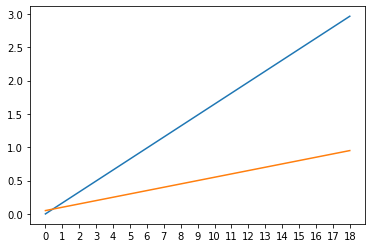

In [78]:
states = np.arange(19)
plt.plot(states, [V(w, state, 0) for state in states])
plt.plot(states, [(state+1)/(len(states)+1) for state in states])
plt.xticks(states)
plt.show()